# Use OSMnx to get street networks by place name

In [1]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

# 1. Query/download place boundaries (Yer sınırlarını sorgulama/indirme)

In [2]:
# neighborhoods or boroughs (mahalle veya ilçe)
gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")

# counties
gdf = ox.geocode_to_gdf("Cook County, Illinois, United States")

# states
gdf = ox.geocode_to_gdf("Iowa")

In [3]:
# you can also buffer the place boundaries (0.5 km in this example)
gdf = ox.geocode_to_gdf("Piedmont, California, USA", buffer_dist=500)

In [4]:
# you can get multiple places in a single query
gdf = ox.geocode_to_gdf(["United Kingdom", "Ireland"])

# or optionally buffer them
places = [
    "Berkeley, California, USA",
    "Oakland, California, USA",
    "Piedmont, California, USA",
    "Emeryville, California, USA",
    "Alameda, Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

In [5]:
# oops, this gets the county of alameda rather than the city!
alameda1 = ox.geocode_to_gdf("Alameda, California, USA")

# this gets the city of alameda
alameda2 = ox.geocode_to_gdf(
    {
        "city": "Alameda",
        "county": "Alameda County",
        "state": "California",
        "country": "USA",
    }
)

# the city is a very small part of the county
alameda1 = ox.project_gdf(alameda1)
alameda2 = ox.project_gdf(alameda2)
alameda2.area.iloc[0] / alameda1.area.iloc[0]

0.027920995208871577

In [6]:
mexico = ox.geocode_to_gdf("Mexico", which_result=2)
type(mexico["geometry"].iloc[0])

shapely.geometry.polygon.Polygon

In [7]:
# let the geocoder find the first Polygon/MultiPolygon result
mexico = ox.geocode_to_gdf("Mexico", which_result=None)
type(mexico["geometry"].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

In [8]:
mexico = ox.geocode_to_gdf({"country": "Mexico"})
type(mexico["geometry"].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

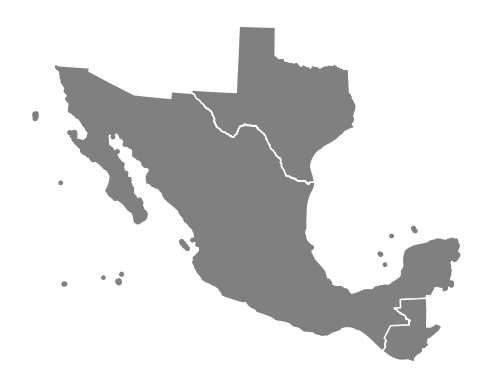

In [9]:
# you can pass multiple queries with mixed types (dicts and strings)
mx_gt_tx = ox.geocode_to_gdf([{"country": "Mexico"}, "Guatemala", {"state": "Texas"}])
mx_gt_tx = ox.project_gdf(mx_gt_tx)
ax = mx_gt_tx.plot(fc="gray", ec="w")
_ = ax.axis("off")

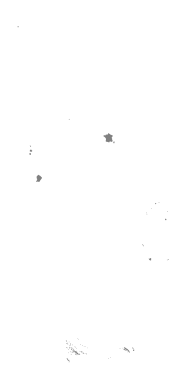

In [10]:
france = ox.geocode_to_gdf("France")
france = ox.project_gdf(france)
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

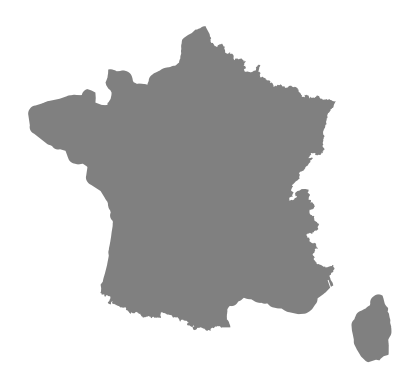

In [11]:
france = ox.project_gdf(ox.geocode_to_gdf("R1403916", by_osmid=True))
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

# 2. Get street networks by place name

In [12]:
# get the walking network for piedmont
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk")

In [13]:
# you can also get a network with a buffer distance (meters) around the place
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk", buffer_dist=200)

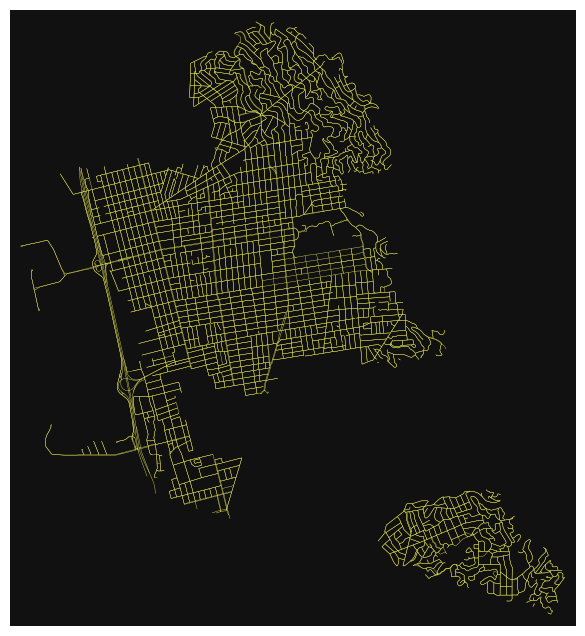

In [14]:
# create a network from multiple places
places = [
    "Piedmont, California, USA",
    {"city": "Berkeley", "state": "California"},
    "Emeryville, California, USA",
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [15]:
# or create a network from structured place queries
places = [
    {"city": "Daly City", "state": "California"},
    {"city": "South San Francisco", "state": "California"},
]
G = ox.graph_from_place(places, network_type="drive")

In [16]:
# get the network for the borough of manhattan (manhattan ilçesi için ağı edinin)
G = ox.graph_from_place("Manhattan, New York, New York, USA", network_type="drive")

In [17]:
# get the network for a neighborhood in downtown LA (Los Angeles şehir merkezindeki bir mahallenin ağını edinin)
place = "Civic Center, Los Angeles, California, USA"
G = ox.graph_from_place(place, network_type="drive")

In [18]:
%%time
# get the network for all of LA
# takes a couple minutes to do all the downloading and processing
place = "Los Angeles, California, USA"
G = ox.graph_from_place(place, network_type="drive", simplify=False, retain_all=True)

CPU times: total: 41.5 s
Wall time: 54.9 s


In [19]:
# create a network constrained to the shape of hong kong island (hong kong adasının şekliyle sınırlı bir ağ oluştur)
G = ox.graph_from_place("Hong Kong Island", network_type="drive")